# **Import the basics Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Connect to google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the Data Set**

In [ ]:
# Assuming your file is in 'My Drive' and named 'mymoviedb.csv'
file_path = '/content/drive/My Drive/mymoviedb.csv'  # Correct full path to file

import pandas as pd
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')  # Correct usage with string path
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# **Explinatory Data Analysis**

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary


*   We have a dataframe consisting 9827 rows and 9 columns.
*   Over data set looks like a tidy with no NaNs or duplicates values.
*   Realse Data_columnsneeds to be casted into data and time and only to extract the year value.
*   Overview and the orignal_language and Poster_url would not be usefull during analysis. so, we will drp them.
*   There is a Noticable outlier in popularity columns.
*   Vote_Average better be catgories for proper analysis.
*   Genre column has comma seprated values and white space that needs to be handled and casted into catagory. exploration summary










In [ ]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) # Changed to_datetime9 to to_datetime

print(df['Release_Date'].dtype)

datetime64[ns]


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the unnessary columns

In [ ]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**Categories Volte_Average column**


We would cut the vote average value and make four categories Popular, Average, Blew_avg, not_popular to describe it more using categories_col() provide above


In [ ]:
def categories_col(df, cols, labels, edges=None):
  """
  Categorizes a column in a DataFrame based on specified edges and labels.

  Args:
    df: The DataFrame to modify.
    cols: The name of the column to categorize.
    labels: The labels to assign to the categories.
    edges: The edges to define the categories. If None, uses quartiles.

  Returns:
    The modified DataFrame.
  """
  if edges is None:
    edges = [df[cols].describe()['max'],
             df[cols].describe()['75%'],
             df[cols].describe()['50%'],
             df[cols].describe()['25%'],
             df[cols].describe()['min']]
  df[cols] = pd.cut(df[cols], edges, labels=labels, duplicates='drop')
  return df

In [ ]:
def categories_col(df, cols, labels, edges=None):
  """
  Categorizes a column in a DataFrame based on specified edges and labels.

  Args:
    df: The DataFrame to modify.
    cols: The name of the column to categorize.
    labels: The labels to assign to the categories.
    edges: The edges to define the categories. If None, uses quartiles.

  Returns:
    The modified DataFrame.
  """
  if edges is None:
    # Ensure edges are in monotonically increasing order
    edges = sorted([df[cols].describe()['min'],
             df[cols].describe()['25%'],
             df[cols].describe()['50%'],
             df[cols].describe()['75%'],
             df[cols].describe()['max']]) # Sorted the edges in ascending order using sorted
  df[cols] = pd.cut(df[cols], edges, labels=labels, duplicates='drop', include_lowest=True)
  return df

In [ ]:
Labels = [' Not_popular', 'Average', 'Blew_avg', 'Popular']
categories_col(df, 'Vote_Average', Labels)

df['Vote_Average'].unique()


['Popular', 'Average', 'Blew_avg', ' Not_popular']
Categories (4, object): [' Not_popular' < 'Average' < 'Blew_avg' < 'Popular']

In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not_popular,2567
Popular,2450
Blew_avg,2412
Average,2398


In [ ]:
# Assuming you want to check for any missing values (NaN) in the DataFrame
df.isin([np.nan]).sum()  # Replace np.nan with desired values to check

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Blew_avg,"Action, Adventure, Thriller, War"


# We'd split genres into a list and then explode our dataframde to have onliy onde genre per ropw for each movie

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
# Casting columns into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [ ]:
df.nunique()

,0
Release_Date,102
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data Visulations

In [ ]:
sns.set_style('whitegrid')

What is the Most Frequent genre of Movies relased on Netfix?

In [ ]:
df['Genre'].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


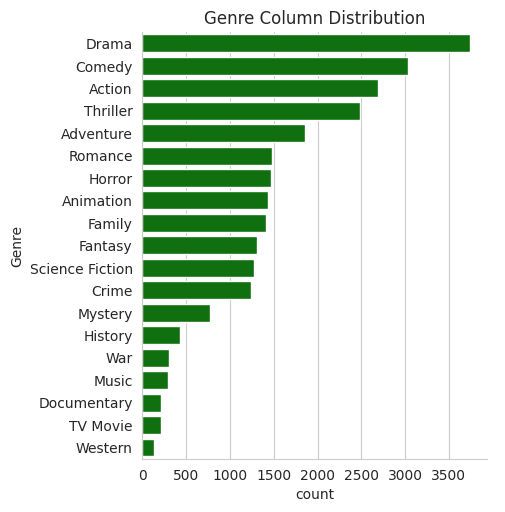

In [ ]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color='Green')
plt.title('Genre Column Distribution')
plt.show()



What has highest votes in vote category

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


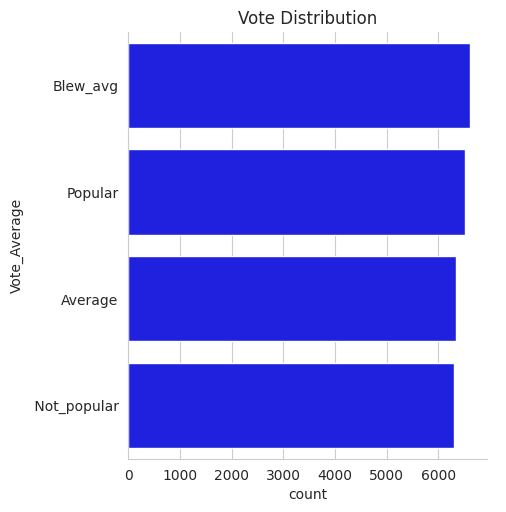

In [ ]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color='Blue')
plt.title('Vote Distribution')
plt.show()


What movie got the highest popularity? what's its Genre?

In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


What movie got the highest popularity? what's its Genre?

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Blew_avg,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Blew_avg,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Blew_avg,History
25790,1984,Threads,13.354,186,Popular,War
25791,1984,Threads,13.354,186,Popular,Drama
25792,1984,Threads,13.354,186,Popular,Science Fiction


Which year has the most filmmed Movies?

In [ ]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

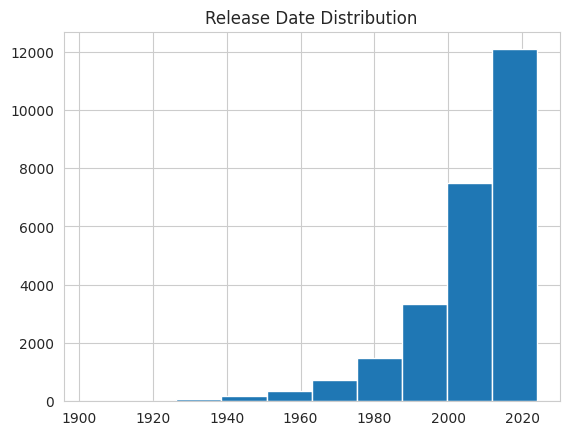

In [ ]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()


**# Conclusion**

Q1: What are the most Frequent Genre in the DataSet?

Ans: Drama genre is the most frequent in our datasetand has appared most then 14% of the times among 19 other genre.

Q2:  What Genre has higest vote?

Ans: We have 25.5% of our Dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more then 18.5% of movie popularity.

Q3: What movie got the highest popularity? what's its Genre?

Ans: Spider-man: No way home has the highest popularity in our Dataset and it has genre of Action, Adventure, and science Fiction.

Q4: Which year has the most flimmed movies?

Ans: Year 2020 has the highest filmming rate in our Dataset.



